Лабораторная работа номер 9

Упражнение 1. а)

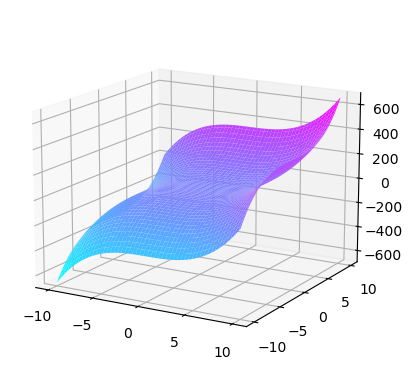

In [20]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import sympy  as sp

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X,Y = np.meshgrid(x, y)
Z = 1/3 * X**3 + 1/3 * Y**3
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool, linewidth=0)
ax.view_init(elev=15)    # elev - угол обзора по вертикали, azim - угол обзора по горизонтали

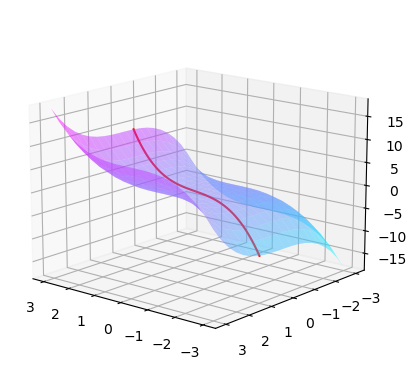

In [65]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xl = np.linspace(-3, 3, 20)
yl = np.linspace(-3, 3, 20)
X,Y = np.meshgrid(xl, yl)
Z = 1/3 * X**3 + 1/3 * Y**3
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool, linewidth=0, alpha=0.5)

t = np.linspace(-1/2, 1, 50)
X_t = 1 - 4*t
Y_t = t
Z_t = 1/3*(X_t**3+Y_t**3)
ax.plot(X_t, Y_t, Z_t, color='r')

ax.view_init(elev=15, azim=130)
plt.show()

б)

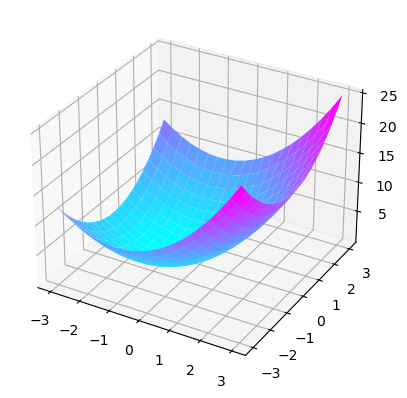

In [87]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xl = np.linspace(-3, 3, 20)
yl = np.linspace(-3, 3, 20)
X,Y = np.meshgrid(xl, yl)
Z = (X+1)**2 + Y**2
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool, linewidth=0)

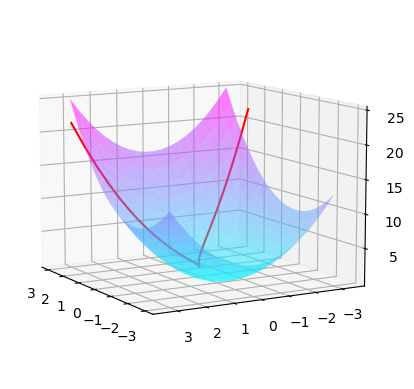

In [86]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xl = np.linspace(-3, 3, 20)
yl = np.linspace(-3, 3, 20)
X,Y = np.meshgrid(xl, yl)
Z = (X+1)**2 + Y**2
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool, linewidth=0, alpha=0.5)

t = np.linspace(-3/2, 3/2, 50)
X_t = t**2
Y_t = t**3
Z_t = (X_t+1)**2 + Y_t**2
ax.plot(X_t, Y_t, Z_t, color='r')

ax.view_init(elev=10, azim=150)
plt.show()

Упражнение 2

In [89]:
# Находим точки, в которых частные производные функции z равны нулю
x, y = sp.symbols('x y')
z = 1/3*x**3 + 1/3*y**3
ex = z.subs(x, 1-4*y).diff(y, 1)
ex1 = z.subs(y, (1-x)/4).diff(x, 1)
print((sp.nsolve(ex1, -1), sp.nsolve(ex, 0)))
print((sp.nsolve(ex1, 1), sp.nsolve(ex, 1)))

(-0.142857142857143, 0.222222222222222)
(0.111111111111111, 0.285714285714286)


Задание 3 a)

In [162]:
def check(z, phi):
    L = z + l * phi
    # print("Функция Лагранжа L(x, y, λ) =", L)
    
    dL_dx = sp.diff(L, x)
    dL_dy = sp.diff(L, y)
    dL_dl = sp.diff(L, l)
    
    # print("Частные производные функции Лагранжа:")
    # print("dL/dx =", dL_dx)
    # print("dL/dy =", dL_dy)
    # print("dL/dλ =", dL_dl)
    
    if dL_dx.is_polynomial(x, y, l) and dL_dy.is_polynomial(x, y, l) and dL_dl.is_polynomial(x, y, l):
        print("функция и ограничения дифференцируемы")
    else:
        print("функция или ограничения не дифференцируемы")

    if sp.hessian(z, (x, y)).is_positive_definite:    # функция вычисления матрицы вторых частных производных
        print("Функция выпукла и ограничена")
    else:
        print("Функция не выпукла или не ограничена")
     
    
x, y, l = sp.symbols('x y l')
z = 1/3 * x**3 + 1/3 * y**3
phi = 1 - x - 4*y
check(z, phi)

функция и ограничения дифференцируемы
Функция не выпукла или не ограничена


б)

In [163]:
z = (x+1)**2 + y**2
phi = y**2 - x**3
check(z, phi)

функция и ограничения дифференцируемы
Функция выпукла и ограничена


Упражнение 4

In [164]:
def lagr_method(z, phi):
    L = z + l * phi

    dL_dx = sp.diff(L, x)
    dL_dy = sp.diff(L, y)
    dL_dl = sp.diff(L, l)

    # Решаем систему уравнений, состоящую из частных производных функции Лагранжа, равных нулю
    solution = sp.solve([dL_dx, dL_dy, dL_dl])

    print("Точки условного экстремума:")
    for point in solution:
        x_val = point[x].evalf()
        y_val = point[y].evalf()
        print("x =", x_val, ", y =", y_val, ", lambda =", point[l])

        
x, y, l = sp.symbols('x y l')
z = (x+1)**2 + y**2
phi = y**2 - x**3        
lagr_method(z, phi)

Точки условного экстремума:
x = -0.333333333333333 - 0.74535599249993*I , y = -0.728988879363168 - 0.113605755649304*I , lambda = -1
x = -0.333333333333333 - 0.74535599249993*I , y = 0.728988879363168 + 0.113605755649304*I , lambda = -1
x = -0.333333333333333 + 0.74535599249993*I , y = -0.728988879363168 + 0.113605755649304*I , lambda = -1
x = -0.333333333333333 + 0.74535599249993*I , y = 0.728988879363168 - 0.113605755649304*I , lambda = -1


Упражнение 5

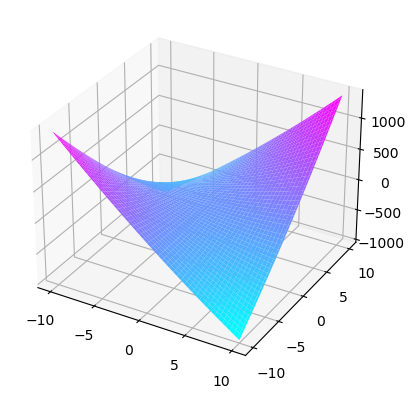

In [165]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X,Y = np.meshgrid(x, y)
Z = X**2 + 12*X*Y + Y**2
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool, linewidth=0)
# ax.view_init(elev=15)

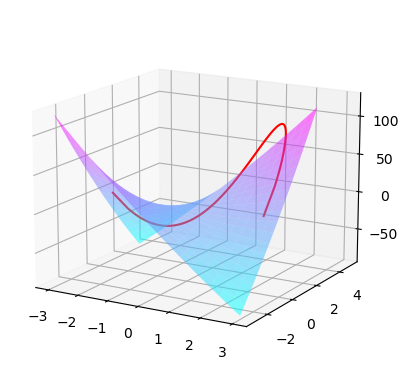

In [166]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xl = np.linspace(-3, 3, 20)
yl = np.linspace(-3, 3, 20)
X,Y = np.meshgrid(xl, yl)
Z = X**2 + 12*X*Y + Y**2
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool, linewidth=0, alpha=0.5)

t = np.linspace(-5/2, 5/2, 100)
X_t = t
Y_t = np.sqrt(25 - 4*t**2)
Z_t = X_t**2 + 12*X_t*Y_t + Y_t**2
ax.plot(X_t, Y_t, Z_t, color='r')

ax.view_init(elev=15, azim=300)
plt.show()

In [171]:
x, y, l = sp.symbols('x y l')
z = x**2 + 12*x*y + y**2
phi = 4*x**2 + y**2 - 25
lagr_method(z, phi)

Точки условного экстремума:
x = 1.87419543953966 , y = -3.30901281617870 , lambda = -5/8 + 3*sqrt(65)/8
x = -1.87419543953966 , y = 3.30901281617870 , lambda = -5/8 + 3*sqrt(65)/8
x = 1.65450640808935 , y = 3.74839087907933 , lambda = -3*sqrt(65)/8 - 5/8
x = -1.65450640808935 , y = -3.74839087907933 , lambda = -3*sqrt(65)/8 - 5/8


ДРУГИЕ ЗАДАНИЯ

In [182]:
x, y, l = sp.symbols('x y l')
z = x**2 + y**2 - 2*x + 3*y
phi = 2*x**2 + y**2 + 2*x*y
check(z, phi)
lagr_method(z, phi)

функция и ограничения дифференцируемы
Функция выпукла и ограничена
Точки условного экстремума:
x = 1.1 + 0.7*I , y = -1.8 + 0.4*I , lambda = -13/34 - I/34
x = 1.1 - 0.7*I , y = -1.8 - 0.4*I , lambda = -13/34 + I/34


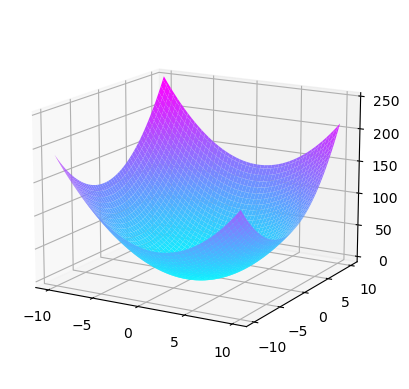

In [183]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X,Y = np.meshgrid(x, y)
Z = X**2 + Y**2 - 2*X + 3*Y
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool, linewidth=0)
ax.view_init(elev=15)

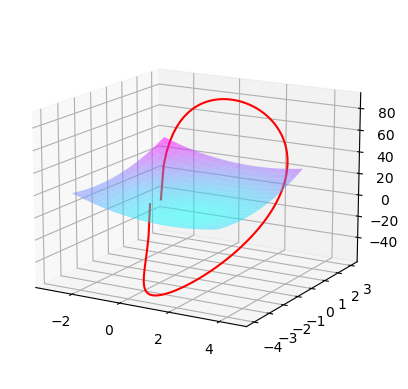

In [184]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xl = np.linspace(-3, 3, 20)
yl = np.linspace(-3, 3, 20)
X,Y = np.meshgrid(xl, yl)
Z = X**2 + Y**2 - 2*X + 3*Y
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool, linewidth=0, alpha=0.5)

t = np.linspace(-3, 3, 100)
X_t = 2 + 5/2 * np.cos(t)
Y_t = -3/2 + 5/2*np.sin(t)
Z = X_t**2 + Y_t**2 - 2*X_t + 3*Y_t
ax.plot(X_t, Y_t, Z_t, color='r')

ax.view_init(elev=15, azim=300)
plt.show()